In [16]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('processed_dataset.csv')

In [3]:
X = df.drop(['Label'], axis=1)
y = df['Label']

In [5]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ExtraTreesClassifier()),
])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesClassifier())])

In [8]:
pipeline.score(X_test, y_test)*100

99.99548722206929

In [9]:
pipeline.score(X_train, y_train)*100

100.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=5)
print(scores, scores.mean())

[0.99987364 0.99994133 0.99997292 0.99993231 0.99997744] 0.9999395287757284


In [12]:
df['Label'].value_counts(normalize=True)

Label
BruteForce      0.2
DDOS            0.2
Normal          0.2
PortScan        0.2
SqlInjection    0.2
Name: proportion, dtype: float64

In [14]:
y_pred = pipeline.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  BruteForce       1.00      1.00      1.00     44319
        DDOS       1.00      1.00      1.00     44318
      Normal       1.00      1.00      1.00     44319
    PortScan       1.00      1.00      1.00     44319
SqlInjection       1.00      1.00      1.00     44318

    accuracy                           1.00    221593
   macro avg       1.00      1.00      1.00    221593
weighted avg       1.00      1.00      1.00    221593



In [18]:
model = pipeline.named_steps['model']

# Now get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

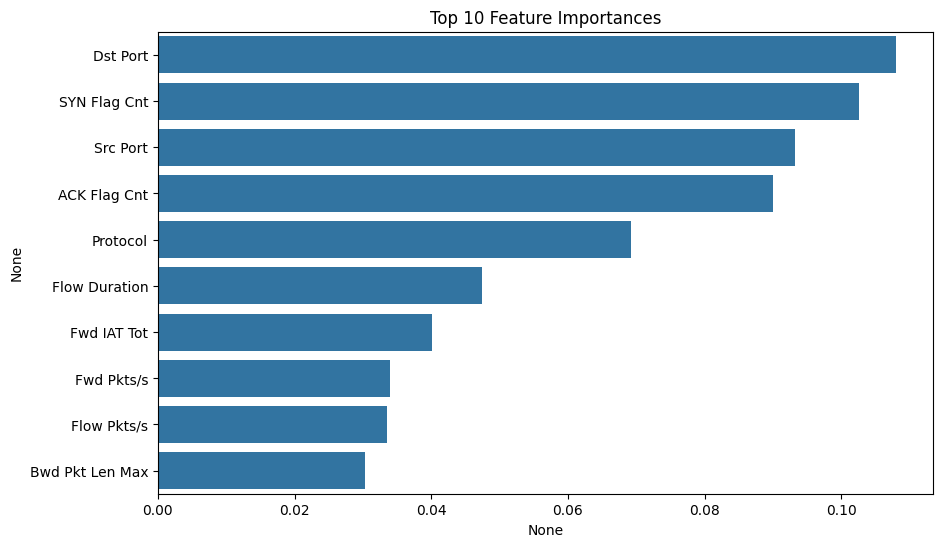

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.nlargest(10), y=feat_importances.nlargest(10).index)
plt.title("Top 10 Feature Importances")
plt.show()

In [20]:
joblib.dump(pipeline, 'NADS_model.pkl')

['NADS_model.pkl']